# Stock Prices EDA

This project analyzes Stock data of various Financial firms from the year 2006-2015. We identify some interesting patterns from the stock data and try to connect them with various events during that period of time including the Recession of 2008.

In [44]:
from pandas_datareader import wb, data
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cufflinks as cf
cf.go_offline()

In [2]:
# Load the dataset
bank_stocks = pd.read_pickle('all_banks')
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [26]:
bank_stocks.columns
# bank_stocks.info()

MultiIndex(levels=[['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], ['Open', 'High', 'Low', 'Close', 'Volume']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['Bank Ticker', 'Stock Info'])

## Data Exploration

In [22]:
# Maximum Close values for each Bank
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [43]:
# Create a DF for per day returns
returns = bank_stocks.xs(key='Close', axis=1, level='Stock Info').pct_change()
returns.columns = ['BAC Return', 'C Return', 'GS Return', 'JPM Return', 'MS Return', 'WFC Return']
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


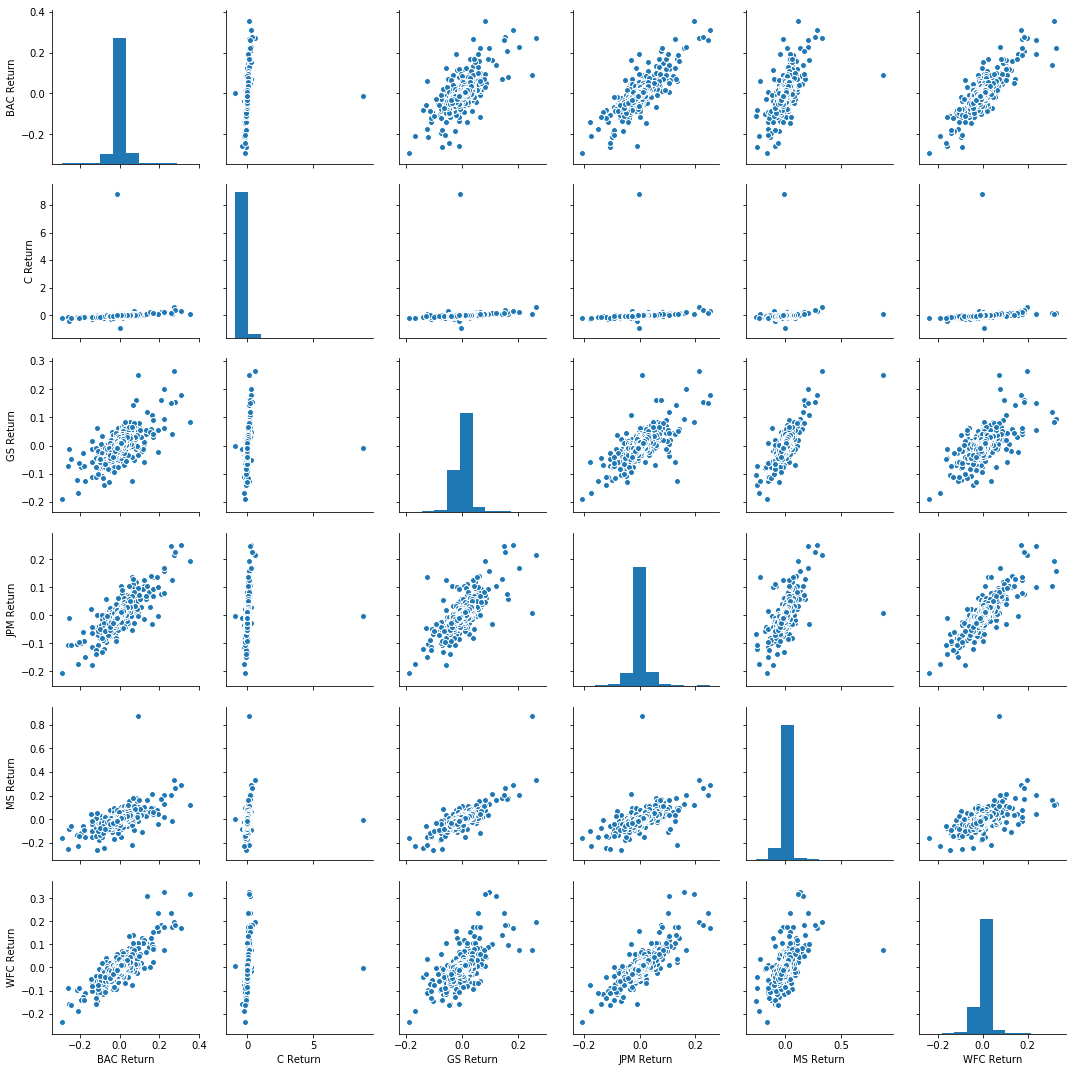

In [47]:
sns.pairplot(returns.iloc[1:])

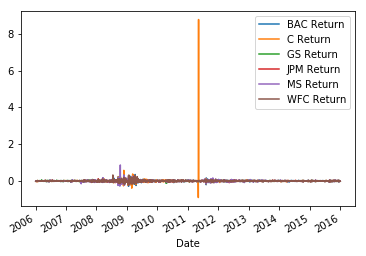

In [61]:
returns.plot()
plt.legend()

In [67]:
# Best Single-day Returns for all banks
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

> Citigroup, JPM and Morgan Stanley's best and worst single-day returns are pretty close!!

In [69]:
# Worst Single-day Returns for all banks
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

> First Inauguration of Barack Obama took place on 20th January, 2009 - 4 of the 6 companies had the worst Return on that day!!

In [70]:
# Standard Deviation for all banks over the entire time period
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

> From the overall Standard Deviation, Citigroup seems to be the riskiest

In [78]:
# Standard Deviation for all banks in the year 2015
returns[pd.Timestamp('2015-01-01') :].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

> Risk profiles are very similar, but BAC & JPM seems to be the riskiest out of them all

C:\Users\Jeet\Anaconda3\envs\virtual_env\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


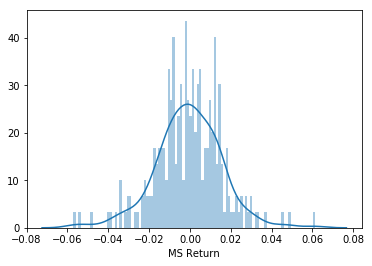

In [83]:
sns.distplot(returns['2015-01-01':]['MS Return'], bins=100)

C:\Users\Jeet\Anaconda3\envs\virtual_env\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


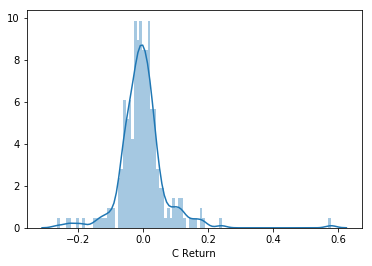

In [84]:
sns.distplot(returns['2008-01-01':'2009-01-01']['C Return'], bins=100)

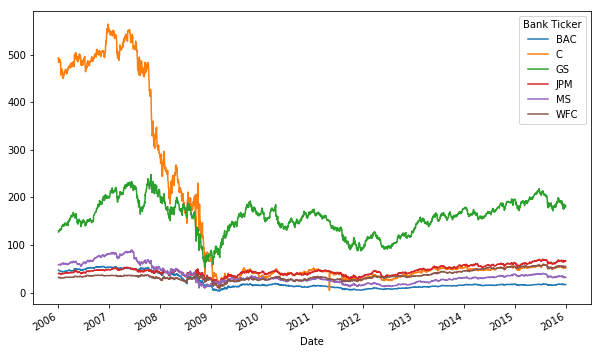

In [95]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(10, 6))

> Citigroup & Goldman Sachs seems to be the biggest players till the 2008 collapse. Citigroup was affected the most in the market crash and never recovered fully while Goldman Sachs has recovered from the crash by 2010.

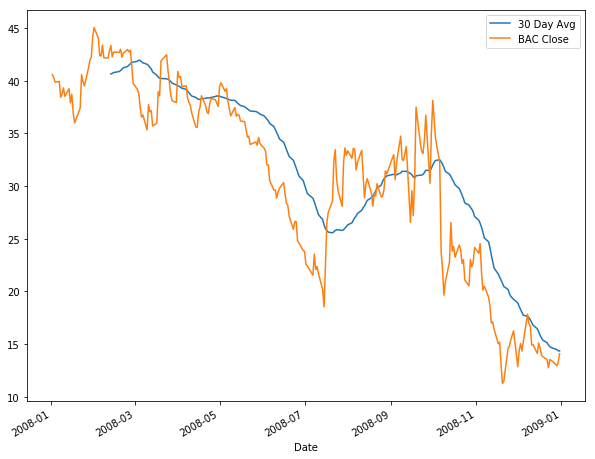

In [107]:
# Rolling 30 day average of BAC against the close price in the year 2008 
plt.figure(figsize=(10, 8))
bank_stocks['2008-01-01' : '2009-01-01'].xs(key='Close', axis=1, level='Stock Info')['BAC'].rolling(window=30).mean().plot(label='30 Day Avg')
bank_stocks['2008-01-01' : '2009-01-01'].xs(key='Close', axis=1, level='Stock Info')['BAC'].plot(label='BAC Close')
plt.legend()

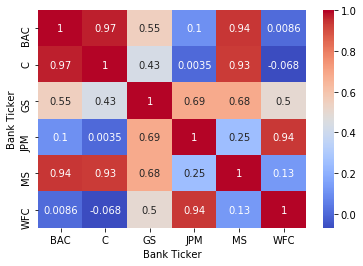

In [119]:
# Correlation among Close prices of all the firms
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='coolwarm')

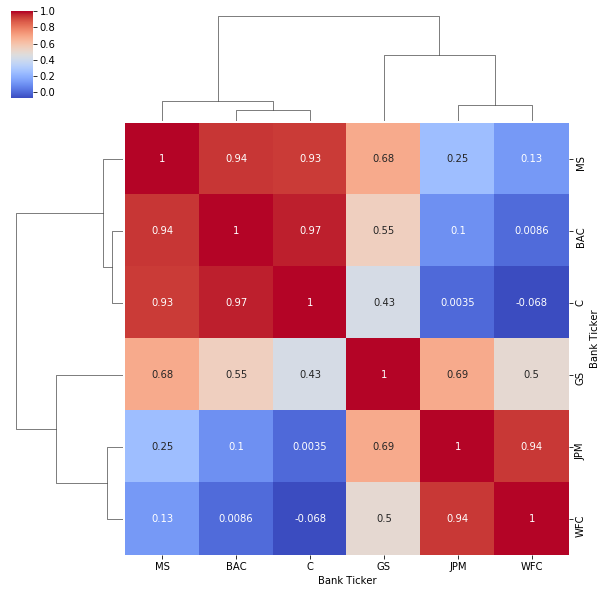

In [120]:
# Correlation among Close prices of all the firms
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='coolwarm')

In [125]:
bank_stocks['2015-01-01':].xs(key='BAC', axis=1, level='Bank Ticker').iplot(kind='candle')

In [127]:
bank_stocks['2015-01-01':].xs(key='MS', axis=1, level='Bank Ticker').ta_plot(study='sma')

In [128]:
bank_stocks['2015-01-01':].xs(key='BAC', axis=1, level='Bank Ticker').ta_plot(study='boll')

In [ ]:
# d = {'num_legs': [4, 4, 2, 2],
#      'num_wings': [0, 0, 2, 2],
#      'class': ['mammal', 'mammal', 'mammal', 'bird'],
#      'animal': ['cat', 'dog', 'bat', 'penguin'],
#      'locomotion': ['walks', 'walks', 'flies', 'walks']}

# df = pd.DataFrame(data = d)
# print(df)
# print("#"*80)

# df.set_index(['class', 'animal', 'locomotion'], inplace=True)
# print(df)
# print("#"*80)

# print(df.xs('mammal'))
# print("#"*80)

# print(df.xs(('mammal', 'cat')))
# print("#"*80)

# print(df.xs(('mammal', 'walks'),
#      level=[0, 2]))